In [1]:
import numpy as np
import pandas as pd
np.random.seed(44)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="rainbow")
import warnings
from matplotlib.offsetbox import AnchoredText
warnings.filterwarnings("ignore")

In [2]:
sizes = [10, 20, 50, 100]
apriori = ['apriori', 'reopt']

sampling = ['greedy', 'sampling','beam']
knn = ['const_demand', 'knn_demand']
fixed = ['flex_posit', 'fixed_posit']
terms = ['1', '2', '3', '4']
filling = ['fil_1','fil_5','fil_9']
partial = ['full','partial']
stoch = ['none','demand','time','both']
model = ['cw','tabu','aco','rnn']
aco = ['aco_1', 'aco_2', 'aco_3', 'aco_4']
recourse = ['naive', 'preventive','switch','reopt']
vehicles = ['vehicles_1', 'vehicles_2', 'vehicles_3', 'vehicles_5']

In [53]:
def read(list_, types, opt_posit):
    
    output = ''
    all_values = {}
    for j in range(len(list_)):
        key = list_[j]
        all_values[key] = {}
        for size in sizes:
            all_values[key][size] = {}
            if types == 'both':
                for apr in apriori:           
                    values = np.loadtxt('csvs/' + str(size) + '_' + apr + '_' + key + ".txt")
                    all_values[key][size][apr] = values
                    best = min(values)
                    if j == opt_posit-1:
                        output = output + ' & \\textbf{' + str(round(best, 2)) + '}'
                    else:
                        output = output + ' & ' + str(round(best, 2))
            else:
                apr = types
                values = np.loadtxt('csvs/' + str(size) + '_' + apr + '_' + key + ".txt")
                all_values[key][size][apr] = values
                best = min(values)
                if j == opt_posit-1:
                    output = output + ' & \\textbf{' + str(round(best, 2)) + '}'
                else:
                    output = output + ' & ' + str(round(best, 2))
        output = output + ' \\' + '\ \n'
                
    return all_values, output
            
# all_values, output = read(aco, 'apriori', 4) 
# all_values, output = read(model, 'apriori', 4)
# all_values, output = read(sampling, 'both', 3)
# all_values, output = read(knn, 'both', 2) # plot demand
# all_values, output = read(stoch, 'both', 5)
# all_values, output = read(terms, 'both', 1)
# all_values, output = read(fixed, 'both', 2) # plot position
# all_values, output = read(filling, 'both', 3)
# all_values, output = read(vehicles, 'both', 4)

all_values, output = read(partial, 'both', 2) # plot supply
# all_values, output = read(recourse, 'apriori', 4)


In [54]:
print(output)

 & 7.0 & 6.79 & 11.89 & 11.53 & 23.57 & 22.86 & 55.9 & 54.22 \\ 
 & \textbf{6.37} & \textbf{6.18} & \textbf{10.83} & \textbf{10.5} & \textbf{21.46} & \textbf{20.82} & \textbf{50.9} & \textbf{49.37} \\ 



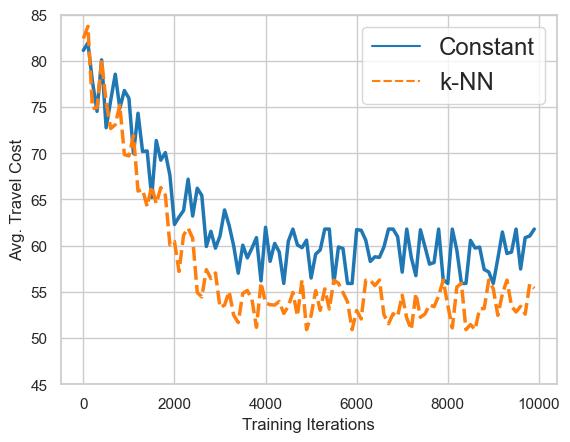

In [56]:
keys = ['const_demand', 'knn_demand']
keys = ['flex_posit', 'fixed_posit']
keys = ['full','partial']
v1 = all_values[keys[0]][100]['apriori'] # apriori
v2 = all_values[keys[1]][100]['apriori'] # reopt
v3 = [100*i for i in range(100)]

data = pd.DataFrame({'Constant':v1,'k-NN':v2})
resplot = sns.lineplot(data=data, palette="tab10", linewidth=2.5)
resplot.set_xticklabels(['', '0', '2000', '4000', '6000', '8000', '10000'])

# resplot.set(xticklabels=[])
resplot.set(xlabel ="Training Iterations", ylabel ="Avg. Travel Cost")

plt.ylim([45,85]) # _50_15
plt.legend(fontsize='x-large', title_fontsize='40')
plt.savefig("plots/supply_apriori.pdf", format="pdf", bbox_extra_artists=(resplot,), bbox_inches='tight')



In [57]:
tables_plot_main = pd.DataFrame(columns=['Models', 'Problem Size', 'Correlated to Uncorrelated gap (in percent %)'])
sizes = [10, 20, 50, 100]
models = ['RL_apriori', 'RL_reopt', 'ACO', 'Tabu', 'CW']

rl_apriori1 = [6.74, 10.92, 21.83, 51.38]
rl_reopt1 = [6.59,  10.61,  21.47,  50.61]
rl_apriori2 = [6.31, 10.73, 21.27, 50.45]
rl_reopt2 = [6.12,  10.41,  20.63,  48.93]

rl_apriori = (np.array(rl_apriori1) - np.array(rl_apriori2))/np.array(rl_apriori2) * 100
rl_reopt = (np.array(rl_reopt1) - np.array(rl_reopt2))/np.array(rl_reopt2) * 100
aco = [0.89, 0.04, -0.06, -1.18]
tabu = [0.08, -0.19, -1.02, -2.14]
cw = [-1.54, -1.59, -2.21, -4.08]

data = [rl_apriori, rl_reopt, aco, tabu, cw]

for i in range(5):
    model_data = data[i]
    model_name = models[i]
    
    for j in range(4):
        size = sizes[j]
        size_data = model_data[j]
        loc = len(tables_plot_main)
        tables_plot_main.loc[loc] = [model_name, size, size_data]



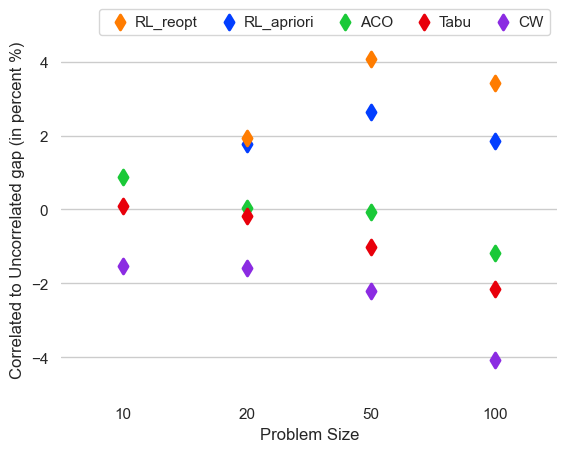

In [58]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x="Problem Size", y="Correlated to Uncorrelated gap (in percent %)", hue="Models",
              data=tables_plot_main, dodge=False, alpha=0.0, zorder=1)

sns.pointplot(x="Problem Size", y="Correlated to Uncorrelated gap (in percent %)", hue="Models",
              data=tables_plot_main, dodge=False,
              join=False, palette="bright",
              markers="d", scale=1.1, ci=None)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend([handles[6]] + [handles[5]] + handles[7:], [labels[6]] + [labels[5]] + labels[7:], title="",
          handletextpad=0, columnspacing=1,
          loc="lower right", bbox_to_anchor=(1.00, 0.95), ncol=5, frameon=True)

plt.ylim(-5, 5)
plt.savefig("plots/main_plot.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
